#A Classifier is built to predict whether a patient has Heart disease or not.The Heart disease dataset is used with 300 rows and 13 attributes with a target column

# Loading Dataset

In [2]:
import pandas as pd
dataset=pd.read_csv(r'C:\Users\hp\.spyder-py3\heart-1.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
print(dataset.shape)

(303, 14)


#Data Exploration

In [8]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

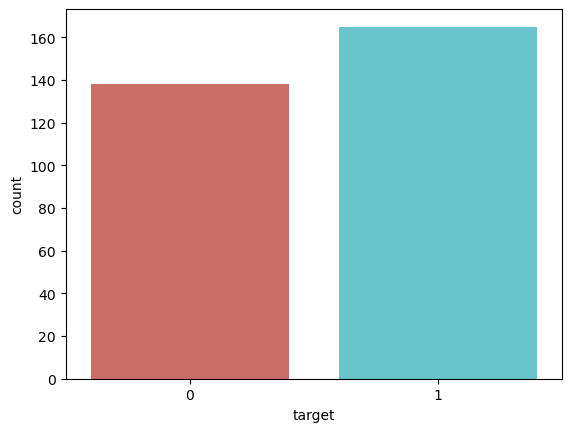

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target',data=dataset,palette='hls')
plt.show

## Split the dataset into features(X) and target (y) label set

In [4]:
X=pd.DataFrame(dataset.iloc[:, :-1])
y=pd.DataFrame(dataset.iloc[ :,-1])

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


## Split the data into a training and test set

In [5]:
#import module to split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

## Create and train the model

In [6]:
#import module for fitting
from sklearn.linear_model import LogisticRegression

#create instance(ie object )of LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting the test set results


In [7]:
y_pred = logmodel.predict(X_test)

## Calculating the accuracy

In [8]:
print('Accuracy:%d',(logmodel.score(X_test,y_test)))

Accuracy:%d 0.7704918032786885


## Evaluate model using Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


The result is telling us that we have 20+27 correct predictions and 10+4 as incorrect predictions

In [9]:
(20+27)/(20+27+4+10)

0.7704918032786885

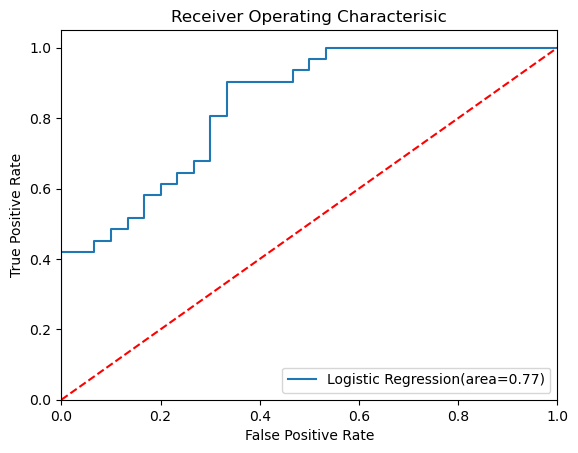

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logmodel.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterisic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic(ROC) curve is used with binary classifiers.The dotted line represents the ROC curve of a purely random classifier,a good classifier stays as far away from that line as possible(towards the top left corner).
Judging from this we can say that our classifier model was good enough with 77% accuracy.